# Reconnaissance d'entités nommées avec SpaCy

La documentation est accessible ici: https://spacy.io/api

## Imports

In [34]:
import os
import re
from collections import Counter, defaultdict
import itertools
import spacy
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [9]:
nlp = spacy.load('fr_core_news_md')

In [3]:
# chargement du corpus
import os

data_path = "../../data/txt_tp4"
files = [f for f in os.listdir(data_path) if f.endswith(".txt")]

corpus_text = ""

for f in files:
    with open(os.path.join(data_path, f), "r", encoding="utf-8") as ff:
        corpus_text += ff.read() + "\n"


In [6]:
# appliquation de Spacy, on traite chaque document individuellementite article par article sinon 
# le corpus est trop grande pour spacy
people = defaultdict(int)
places = defaultdict(int)
orgs = defaultdict(int)

for f in files:
    with open(os.path.join(data_path, f), "r", encoding="utf-8") as ff:
        text = ff.read()

    nlp = spacy.load("fr_core_news_md", disable=["parser", "tagger", "lemmatizer"])


    for ent in doc.ents:
        if ent.label_ == "PER":
            people[ent.text] += 1
        elif ent.label_ == "LOC":
            places[ent.text] += 1
        elif ent.label_ == "ORG":
            orgs[ent.text] += 1



In [7]:
# afficher les 20 entités les plus fréquentes par catégorie
print("PERSONNES les plus citées :")
for p, n in sorted(people.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f" - {p}: {n}")

print("\nLIEUX les plus cités :")
for p, n in sorted(places.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f" - {p}: {n}")

print("\nORGANISATIONS les plus citées :")
for p, n in sorted(orgs.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f" - {p}: {n}")


PERSONNES les plus citées :
 - Beethoven: 5994
 - Feuilleton: 4995
 - Irène: 4995
 - Soames: 4995
 - MHz: 3996
 - Mélodie: 3996
 - Michèle: 3996
 - Forsyte: 2997
 - Messe: 2997
 - Jo: 2997
 - Mozart: 2997
 - Mc: 2997
 - Cavani: 1998
 - Théodorakis: 1998
 - Raoul Walsh: 1998
 - Orgosolo: 1998
 - Tchaïkovsky: 1998
 - Bach: 1998
 - Annette: 1998
 - B.R.T.: 1998

LIEUX les plus cités :
 - Londres: 3996
 - MHz: 3996
 - R.T.B.: 2997
 - B.R.T.: 2997
 - Bruxelles: 2997
 - Vibrato: 2997
 - France: 1998
 - Panoramique: 1998
 - Boers: 1998
 - Barbe-Bleue: 1998
 - Flandres: 1998
 - 98,0 MHz: 1998
 - f t SAMEE: 999
 - ^: 999
 - Participent: 999
 - Autorama: 999
 - Kate’: 999
 - Grande-Bretagne: 999
 - T.F 2: 999
 - Télé-bridge: 999

ORGANISATIONS les plus citées :
 - ALLEMAGNE: 5994
 - LUXEMBOURG: 3996
 - Journal TV: 1998
 - SOTTENS: 1998
 - v''"'C: 999
 - Université populaire: 999
 - Maffia: 999
 - HOLLANDE: 999
 - Avroskoop: 999
 - Tennis Club de Belgiaue: 999
 - O.N.U. T.V.A.: 999
 - Le': 999
 -

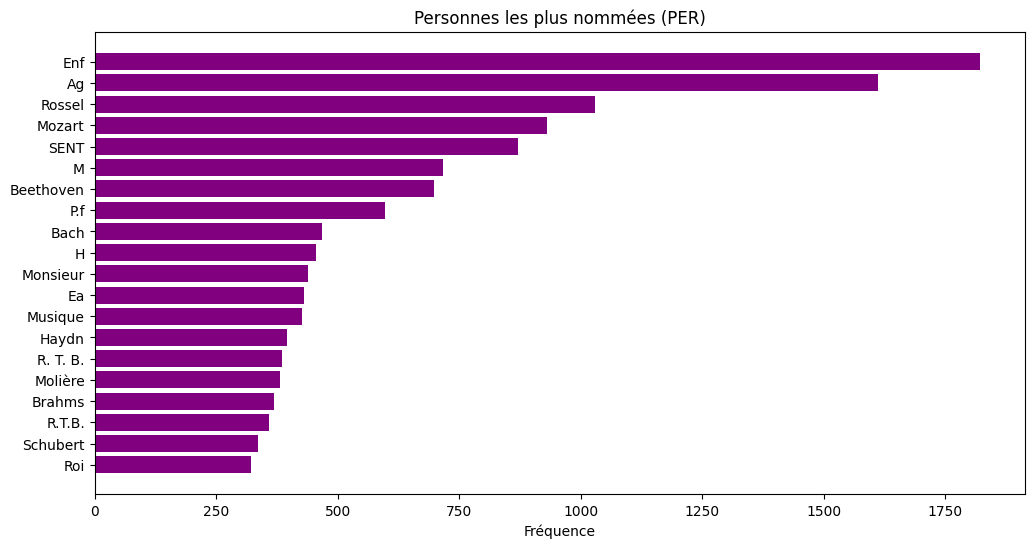

In [8]:
# graphique des personnes les plus citées
import matplotlib.pyplot as plt

def plot_top_dict(dico, title, top=20):
    items = sorted(dico.items(), key=lambda x: x[1], reverse=True)[:top]
    labels, values = zip(*items)

    plt.figure(figsize=(12,6))
    plt.barh(labels, values, color="purple")
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Fréquence")
    plt.show()

# Exemple :
plot_top_dict(people, "Personnes les plus nommées (PER)")


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# mots clés
mots_themes = {"sorcellerie","sorcière","witch","féminisme","femme","procès"}

# construire le réseau
G = nx.Graph()
cooc = defaultdict(int)

for f in files:
    text = open(os.path.join(data_path, f), encoding="utf-8").read()
    doc = nlp(text)
    words = [t.text.lower() for t in doc]

    # vérifier présence mots thématiques
    if any(m in " ".join(words) for m in mots_themes):
        for ent in doc.ents:
            if ent.label_ in {"PER","LOC","ORG"}:
                cooc[ent.text] += 1
                G.add_edge(ent.text, "Thème", weight=1)

# visualisation réseau
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, k=0.5)

nx.draw(
    G, pos,
    with_labels=True,
    node_size=800,
    node_color="violet",
    edge_color="gray",
    font_size=8
)
plt.title("Graphique de cooccurrences entités ↔ thématique")
plt.show()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105e93ed0>>
Traceback (most recent call last):
  File "/Users/ilaria/Desktop/STIC/traitement_auto_corpus/tac/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 797, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Traitement des fichiers: 100%|██████████| 999/999 [10:17<00:00,  1.62it/s]

PERSONNES les plus citées :


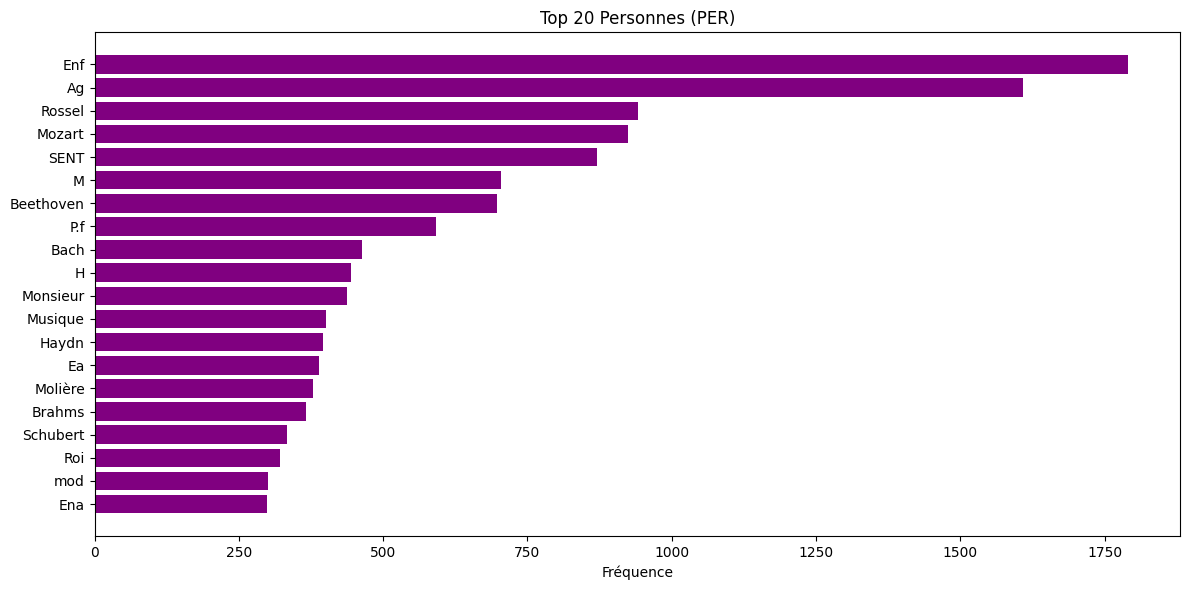


LIEUX les plus cités :


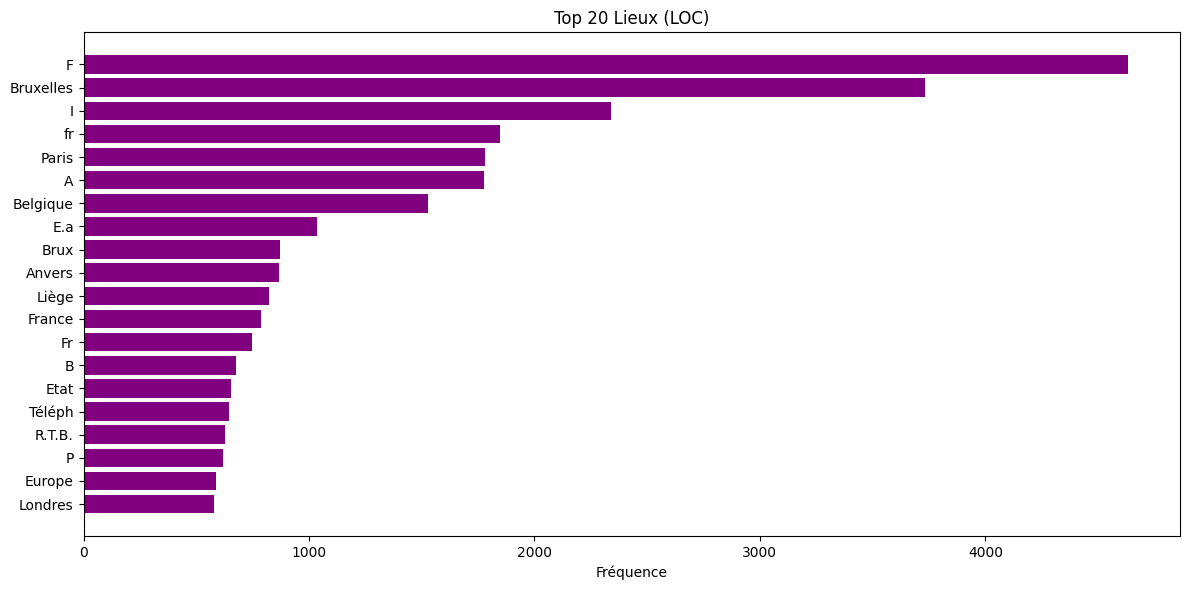


ORGANISATIONS les plus citées :


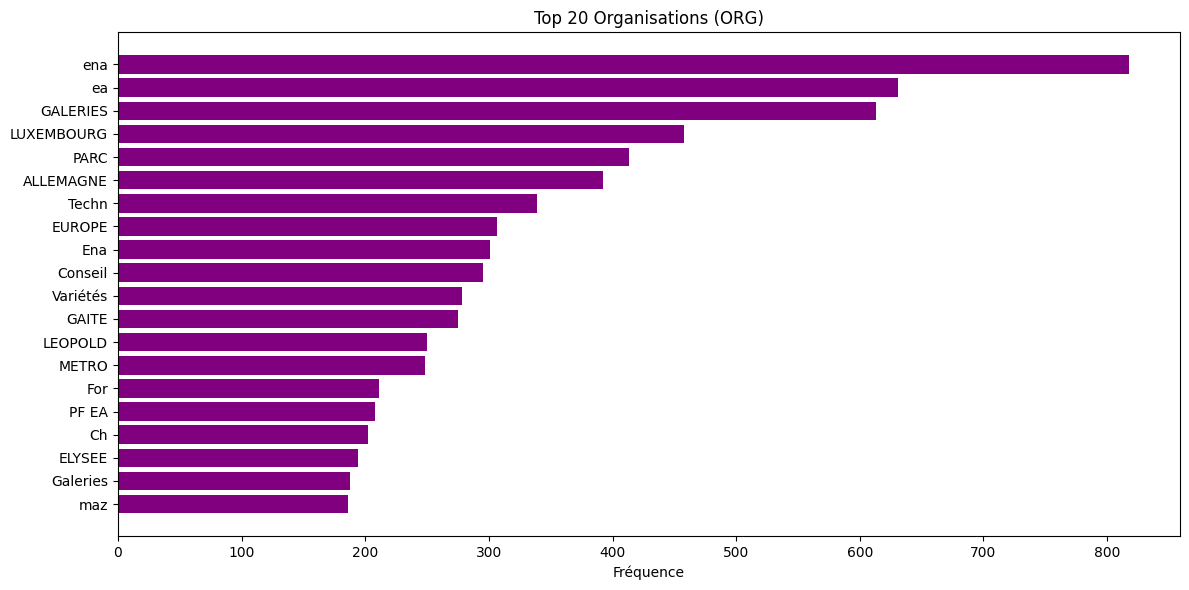

Construction du réseau: 100%|██████████| 999/999 [10:28<00:00,  1.59it/s]


In [ ]:
import os
import re
from collections import Counter, defaultdict
import spacy
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Chargement du modèle spaCy (une seule fois, avec optimisations)
nlp = spacy.load('fr_core_news_md', disable=["parser", "tagger", "lemmatizer"])

# Chemin vers les données
data_path = "../../data/txt_tp4"
files = [f for f in os.listdir(data_path) if f.endswith(".txt")]

# Dictionnaires pour stocker les entités
people = defaultdict(int)
places = defaultdict(int)
orgs = defaultdict(int)

# Expression régulière pour filtrer les entités non pertinentes (ex: "MHz", "B.R.T.")
entity_clean_pattern = re.compile(r'^\d+,\d+\s?MHz$|^[A-Z]{2,3}\.?$|^[\d\W]+$')

# Traitement des fichiers
for f in tqdm(files, desc="Traitement des fichiers"):
    with open(os.path.join(data_path, f), "r", encoding="utf-8") as ff:
        text = ff.read()
        doc = nlp(text)  # Analyse avec spaCy

        for ent in doc.ents:
            # Filtre des entités non pertinentes
            if entity_clean_pattern.search(ent.text):
                continue

            if ent.label_ == "PER":
                people[ent.text] += 1
            elif ent.label_ == "LOC":
                places[ent.text] += 1
            elif ent.label_ == "ORG":
                orgs[ent.text] += 1

# Fonction pour afficher les top entités
def plot_top_entities(entities_dict, title, top=20):
    items = sorted(entities_dict.items(), key=lambda x: x[1], reverse=True)[:top]
    labels, values = zip(*items)

    plt.figure(figsize=(12, 6))
    plt.barh(labels, values, color="purple")
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel("Fréquence")
    plt.tight_layout()
    plt.show()

# Affichage des résultats
print("PERSONNES les plus citées :")
plot_top_entities(people, "Top 20 Personnes (PER)")

print("\nLIEUX les plus cités :")
plot_top_entities(places, "Top 20 Lieux (LOC)")

print("\nORGANISATIONS les plus citées :")
plot_top_entities(orgs, "Top 20 Organisations (ORG)")

# -------------------------------------------------------------------
# Partie 2 : Réseau de cooccurrences avec mots-clés thématiques
# -------------------------------------------------------------------
mots_themes = {"sorcellerie", "sorcière", "witch", "féminisme", "femme", "procès"}

# Graphique de cooccurrences
G = nx.Graph()
cooc = defaultdict(int)

for f in tqdm(files, desc="Construction du réseau"):
    with open(os.path.join(data_path, f), "r", encoding="utf-8") as ff:
        text = ff.read()
        doc = nlp(text)
        words = [t.text.lower() for t in doc]

        # Vérification de la présence de mots thématiques
        if any(mot in words for mot in mots_themes):
            for ent in doc.ents:
                if ent.label_ in {"PER", "LOC", "ORG"}:
                    if not entity_clean_pattern.search(ent.text):  # Filtre
                        cooc[ent.text] += 1
                        G.add_node(ent.text, type=ent.label_)
                        G.add_edge(ent.text, "Thème")

# Visualisation du réseau
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)  # seed pour reproductibilité

node_colors = []
for node in G.nodes():
    if node == "Thème":
        node_colors.append("red")
    else:
        node_colors.append("violet")

nx.draw(
    G, pos,
    with_labels=True,
    node_size=1000,
    node_color=node_colors,
    edge_color="gray",
    font_size=10,
    font_weight="bold"
)
plt.title("Réseau de cooccurrences : Entités ↔ Thématique (Sorcellerie/Féminisme)", pad=20)
plt.show()
